# Meaningful Question 2: 
## For the homes where we have data on the last year renovated, does it have a similar impact as age?

## Imports

In [1]:
import pandas as pd
import numpy as np
from helpers import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

df = pd.read_csv("kc_house_data.csv")

## Data Cleaning

In [5]:
# Creating a new dataframe with only these four columns
yr_df = df.filter(["date", "price", "yr_built", "yr_renovated"])

In [2]:
# Filling null values with 0
yr_df["yr_renovated"] = yr_df["yr_renovated"].fillna(0)

In [3]:
# Changing years in the Year Renovated column to integers
yr_df["yr_renovated"] = yr_df["yr_renovated"].apply(lambda x: to_int(x))

In [4]:
# Changing dates in the Date column into datetime objects
yr_df['date'] = pd.to_datetime(yr_df['date'])

#### Creating a dataframe with all homes that have information on when they were renovated

In [19]:
with_reno_df = yr_df.where(yr_df["yr_renovated"] > 0).dropna()

In [20]:
with_reno_df = with_reno_df.sort_values(by="yr_renovated")

#### Creating a dataframe with all homes that do not have information on when they were renovated

In [53]:
without_reno_df = yr_df.where(yr_df["yr_renovated"] == 0).dropna()

In [56]:
without_reno_df = without_reno_df.sort_values(by="yr_built")

## Data Overview

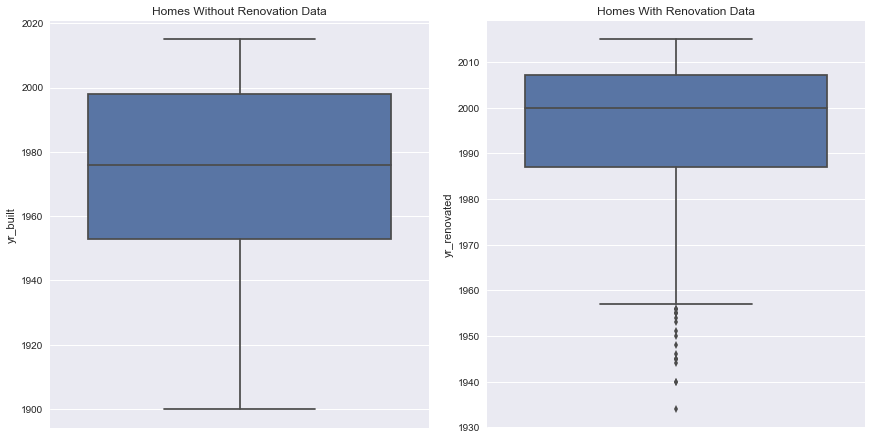

In [59]:
f1, axes = plt.subplots(1, 2, figsize=(12,6), constrained_layout=True)

yr_built_col = without_reno_df["yr_built"]
yr_reno_col = with_reno_df["yr_renovated"]

ax1_0 = sns.boxplot(yr_built_col, orient='v', ax=axes[0])
ax1_1 = sns.boxplot(yr_reno_col, orient='v', ax=axes[1])

ax1_0.title.set_text("Homes Without Renovation Data")
ax1_1.title.set_text("Homes With Renovation Data")

plt.show()

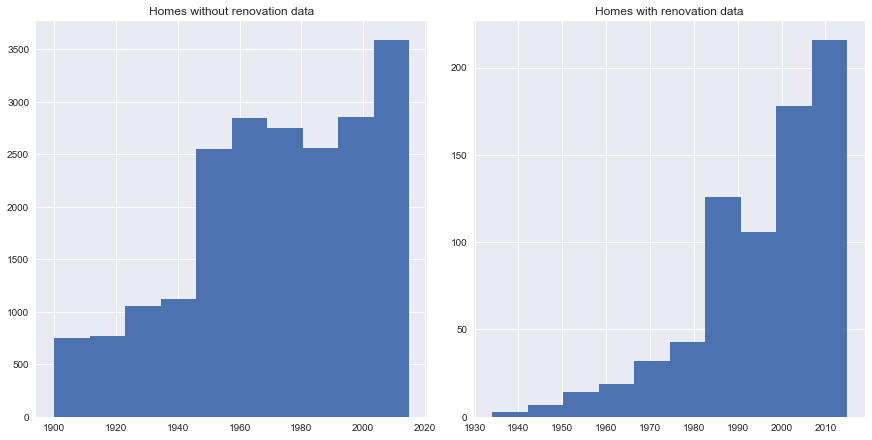

In [60]:
f2, axes = plt.subplots(1, 2, figsize=(12,6), constrained_layout=True)

ax2_0 = yr_built_col.hist(ax=axes[0])
ax2_1 = yr_reno_col.hist(ax=axes[1])

ax2_0.title.set_text("Homes Without Renovation Data")
ax2_1.title.set_text("Homes With Renovation Data")

plt.show()

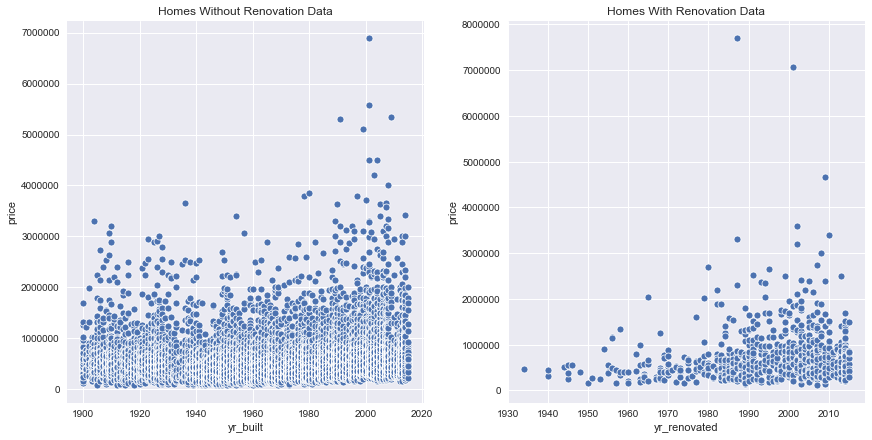

In [69]:
f3, axes = plt.subplots(1, 2, figsize=(12,6), constrained_layout=True)

ax3_0 = sns.scatterplot(x="yr_built", y="price", data=without_reno_df, ax=axes[0])
ax3_1 = sns.scatterplot(x="yr_renovated", y="price", data=with_reno_df, ax=axes[1])

ax3_0.title.set_text("Homes Without Renovation Data")
ax3_1.title.set_text("Homes With Renovation Data")

plt.show()